In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [279]:
df = pd.read_csv("~/Desktop/Assignment/Heart_Failure_Prediction_Team_0/data/raw/heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [280]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [281]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [283]:

df['Sex'] = df['Sex'].astype(str)

# Create a pie chart
fig = px.pie(df, 
             names="Sex", 
             title="Sex Ratio in the Data", 
             color="Sex", 
             color_discrete_map={"M": "blue", "F": "red"})  # Assign colors

# Show the plot
fig.show()


In [284]:
# Create a histogram for the distribution of Heart Disease by Sex with custom colors
fig = px.histogram(df, 
                   x="HeartDisease", 
                   color="Sex", 
                   hover_data=df.columns, 
                   title="Distribution of Heart Diseases", 
                   barmode="group",
                   color_discrete_map={"M": "blue", "F": "red"})  # Blue for M and Red for F

# Show the plot
fig.show()

# Print the percentage of males and females with Heart Disease
print(f"The percentage of males with Heart Disease is: {male_percentage:.2f}%")
print(f"The percentage of females with Heart Disease is: {female_percentage:.2f}%")

The percentage of males with Heart Disease is: 90.16%
The percentage of females with Heart Disease is: 9.84%


In [285]:
fig=px.histogram(df,
                 x="Age",
                 color="HeartDisease",
                 hover_data=df.columns,
                 title="Age distribution of people with and without HeartDisease")
fig.show()

In [286]:
# Assuming 'df' is the DataFrame containing your data

# Filter data where HeartDisease = 1
df_heart_disease = df[df['HeartDisease'] == 1]

# Calculate the total number of people with HeartDisease = 1
total_heart_disease = len(df_heart_disease)

# Separate the data into males and females
df_male = df_heart_disease[df_heart_disease['Sex'] == 'M']
df_female = df_heart_disease[df_heart_disease['Sex'] == 'F']

# Calculate averages and percentages
average_age = df_heart_disease['Age'].mean()
average_age_male = df_male['Age'].mean()
average_age_female = df_female['Age'].mean()

male_percentage = (len(df_male) / total_heart_disease) * 100
female_percentage = (len(df_female) / total_heart_disease) * 100

mean_restingBP = df_heart_disease['RestingBP'].mean()
mean_cholesterol = df_heart_disease['Cholesterol'].mean()
mean_fastingBS = df_heart_disease['FastingBS'].mean()
mean_maxHR = df_heart_disease['MaxHR'].mean()

# Total average for percentage contribution calculation
total_avg = (mean_restingBP + mean_cholesterol + mean_fastingBS + mean_maxHR) / 4

# Print results
print(f"Average Age (Heart Disease): {average_age:.2f} | Male: {average_age_male:.2f} | Female: {average_age_female:.2f}")
print(f"Males with Heart Disease: {male_percentage:.2f}% | Females: {female_percentage:.2f}%")
print(f"RestingBP: {mean_restingBP:.2f}, Cholesterol: {mean_cholesterol:.2f}, FastingBS: {mean_fastingBS:.2f}, MaxHR: {mean_maxHR:.2f}")
print(f"Total Average: {total_avg:.2f}")
print(f"RestingBP Contribution: {((mean_restingBP / total_avg) * 100):.2f}%")
print(f"Cholesterol Contribution: {((mean_cholesterol / total_avg) * 100):.2f}%")
print(f"FastingBS Contribution: {((mean_fastingBS / total_avg) * 100):.2f}%")
print(f"MaxHR Contribution: {((mean_maxHR / total_avg) * 100):.2f}%")


Average Age (Heart Disease): 55.90 | Male: 55.87 | Female: 56.18
Males with Heart Disease: 90.16% | Females: 9.84%
RestingBP: 134.19, Cholesterol: 175.94, FastingBS: 0.33, MaxHR: 127.66
Total Average: 109.53
RestingBP Contribution: 122.51%
Cholesterol Contribution: 160.63%
FastingBS Contribution: 0.31%
MaxHR Contribution: 116.55%


In [287]:
# Filter data where HeartDisease = 1
df_heart_disease = df[df['HeartDisease'] == 1]

# Calculate total number of people with HeartDisease = 1
total_heart_disease = df_heart_disease.shape[0]

# Count the occurrences of each ChestPainType (ATA, NAP, ASY) for people with HeartDisease = 1
count_ATA = df_heart_disease[df_heart_disease['ChestPainType'] == 'ATA'].shape[0]
count_NAP = df_heart_disease[df_heart_disease['ChestPainType'] == 'NAP'].shape[0]
count_ASY = df_heart_disease[df_heart_disease['ChestPainType'] == 'ASY'].shape[0]

# Calculate the percentages
percentage_ATA = (count_ATA / total_heart_disease) * 100
percentage_NAP = (count_NAP / total_heart_disease) * 100
percentage_ASY = (count_ASY / total_heart_disease) * 100

# Print the results with percentages
print(f"Number of people with HeartDisease = 1 and ChestPainType = ATA: {count_ATA} ({percentage_ATA:.2f}%)")
print(f"Number of people with HeartDisease = 1 and ChestPainType = NAP: {count_NAP} ({percentage_NAP:.2f}%)")
print(f"Number of people with HeartDisease = 1 and ChestPainType = ASY: {count_ASY} ({percentage_ASY:.2f}%)")

Number of people with HeartDisease = 1 and ChestPainType = ATA: 24 (4.72%)
Number of people with HeartDisease = 1 and ChestPainType = NAP: 72 (14.17%)
Number of people with HeartDisease = 1 and ChestPainType = ASY: 392 (77.17%)


In [288]:
# Filter data where HeartDisease = 1
df_heart_disease = df[df['HeartDisease'] == 1]

# Calculate the average age for those with HeartDisease = 1
average_age = df_heart_disease['Age'].mean()


# Separate the data into males and females
df_male = df_heart_disease[df_heart_disease['Sex'] == 'M']
df_female = df_heart_disease[df_heart_disease['Sex'] == 'F']

# Calculate the average age for males and females with HeartDisease = 1
average_age_male = df_male['Age'].mean()
average_age_female = df_female['Age'].mean()


# Calculate the mean values for the relevant columns
mean_restingBP = df_heart_disease['RestingBP'].mean()
mean_cholesterol = df_heart_disease['Cholesterol'].mean()
mean_fastingBS = df_heart_disease['FastingBS'].mean()
mean_maxHR = df_heart_disease['MaxHR'].mean()

# Print the average age
print(f"The average age for people with Heart Disease is: {average_age:.2f}")
print(f"The average age for males with Heart Disease is: {average_age_male:.2f}")
print(f"The average age for females with Heart Disease is: {average_age_female:.2f}")

# Print the results
print(f"Mean RestingBP for people with Heart Disease: {mean_restingBP:.2f}")
print(f"Mean Cholesterol for people with Heart Disease: {mean_cholesterol:.2f}")
print(f"Mean FastingBS for people with Heart Disease: {mean_fastingBS:.2f}")
print(f"Mean MaxHR for people with Heart Disease: {mean_maxHR:.2f}")

The average age for people with Heart Disease is: 55.90
The average age for males with Heart Disease is: 55.87
The average age for females with Heart Disease is: 56.18
Mean RestingBP for people with Heart Disease: 134.19
Mean Cholesterol for people with Heart Disease: 175.94
Mean FastingBS for people with Heart Disease: 0.33
Mean MaxHR for people with Heart Disease: 127.66


In [289]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])



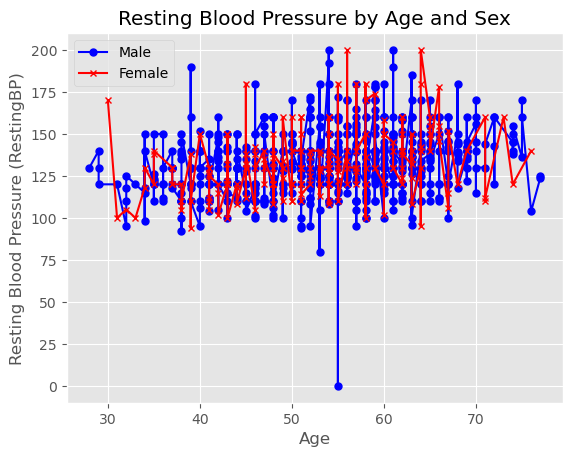

In [290]:
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing your data
# Filter data for males and females
df_male = df[df['Sex'] == 'M'].sort_values(by='Age')  # Sort males by Age
df_female = df[df['Sex'] == 'F'].sort_values(by='Age')  # Sort females by Age

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plotting RestingBP vs Age for males
ax.plot(df_male['Age'], df_male['RestingBP'], label='Male', color='blue', marker='o', linestyle='-', markersize=5)

# Plotting RestingBP vs Age for females
ax.plot(df_female['Age'], df_female['RestingBP'], label='Female', color='red', marker='x', linestyle='-', markersize=5)

# Adding labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Resting Blood Pressure (RestingBP)')
ax.set_title('Resting Blood Pressure by Age and Sex')

# Adding a legend
ax.legend()

# Display the plot
plt.show()


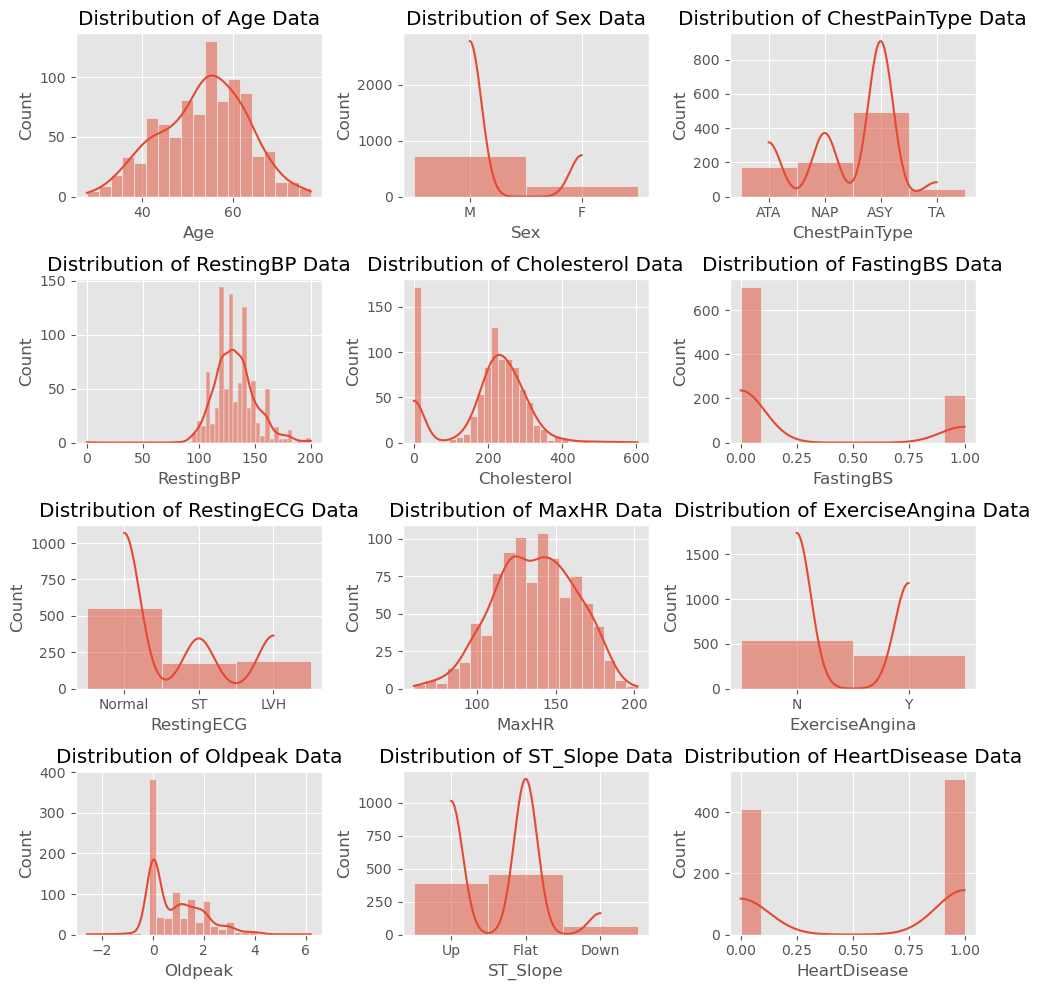

In [291]:
plt.figure(figsize=(10,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [292]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

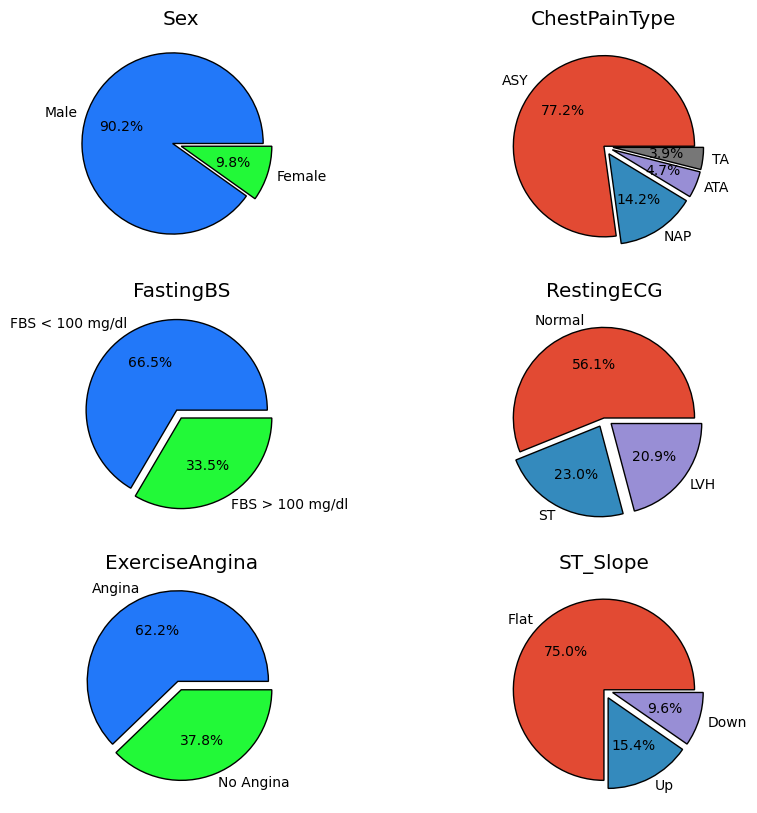

In [293]:
ax,fig = plt.subplots(nrows = 3,ncols = 2,figsize = (10,10))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 0,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 0,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 100 mg/dl','FBS > 100 mg/dl'],autopct='%1.1f%%',startangle = 0,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 0,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 0,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 0,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

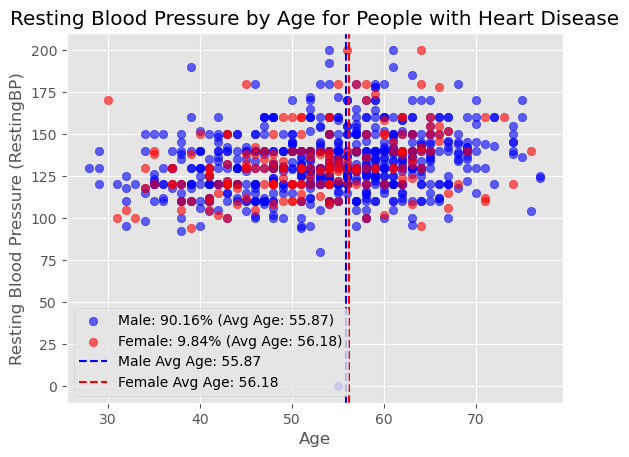

In [294]:


# Create the figure and axis objects
fig, ax = plt.subplots()

# Plotting RestingBP vs Age for males with HeartDisease
ax.scatter(df_male['Age'], df_male['RestingBP'], color='blue', label=f'Male: {male_percentage:.2f}% (Avg Age: {average_age_male:.2f})', alpha=0.6)

# Plotting RestingBP vs Age for females with HeartDisease
ax.scatter(df_female['Age'], df_female['RestingBP'], color='red', label=f'Female: {female_percentage:.2f}% (Avg Age: {average_age_female:.2f})', alpha=0.6)

# Adding labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Resting Blood Pressure (RestingBP)')
ax.set_title('Resting Blood Pressure by Age for People with Heart Disease')

# Adding the average age lines (optional)
ax.axvline(x=average_age_male, color='blue', linestyle='--', label=f'Male Avg Age: {average_age_male:.2f}')
ax.axvline(x=average_age_female, color='red', linestyle='--', label=f'Female Avg Age: {average_age_female:.2f}')

# Adding a legend
ax.legend()

# Display the plot
plt.show()



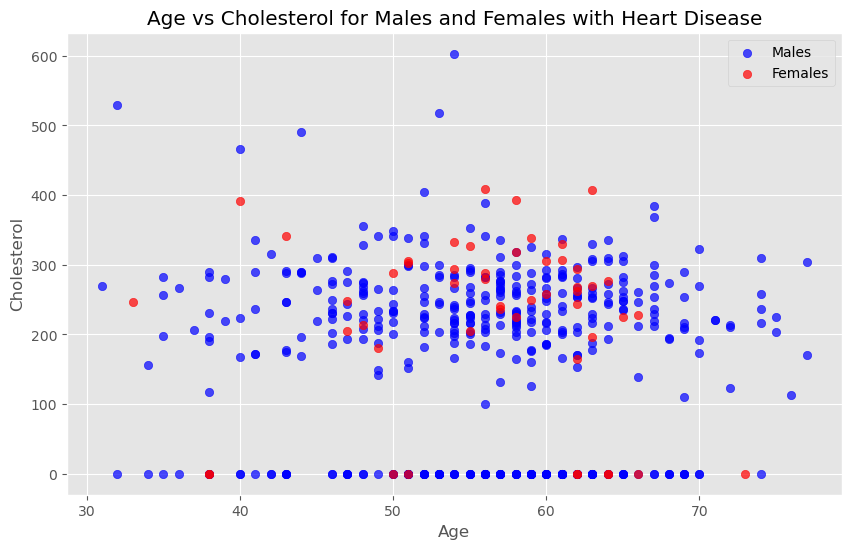

In [295]:


# Filter data for males and females with Heart Disease
df_male_heart_disease = df[(df['Sex'] == 'M') & (df['HeartDisease'] == 1)]
df_female_heart_disease = df[(df['Sex'] == 'F') & (df['HeartDisease'] == 1)]

# Plot Age vs Cholesterol for males and females with Heart Disease
plt.figure(figsize=(10, 6))

# Plot males with blue
plt.scatter(df_male_heart_disease['Age'], df_male_heart_disease['Cholesterol'], color='blue', alpha=0.7, label='Males')

# Plot females with red
plt.scatter(df_female_heart_disease['Age'], df_female_heart_disease['Cholesterol'], color='red', alpha=0.7, label='Females')

# Title and labels
plt.title('Age vs Cholesterol for Males and Females with Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')



# Add legend
plt.legend()

# Show plot
plt.show()


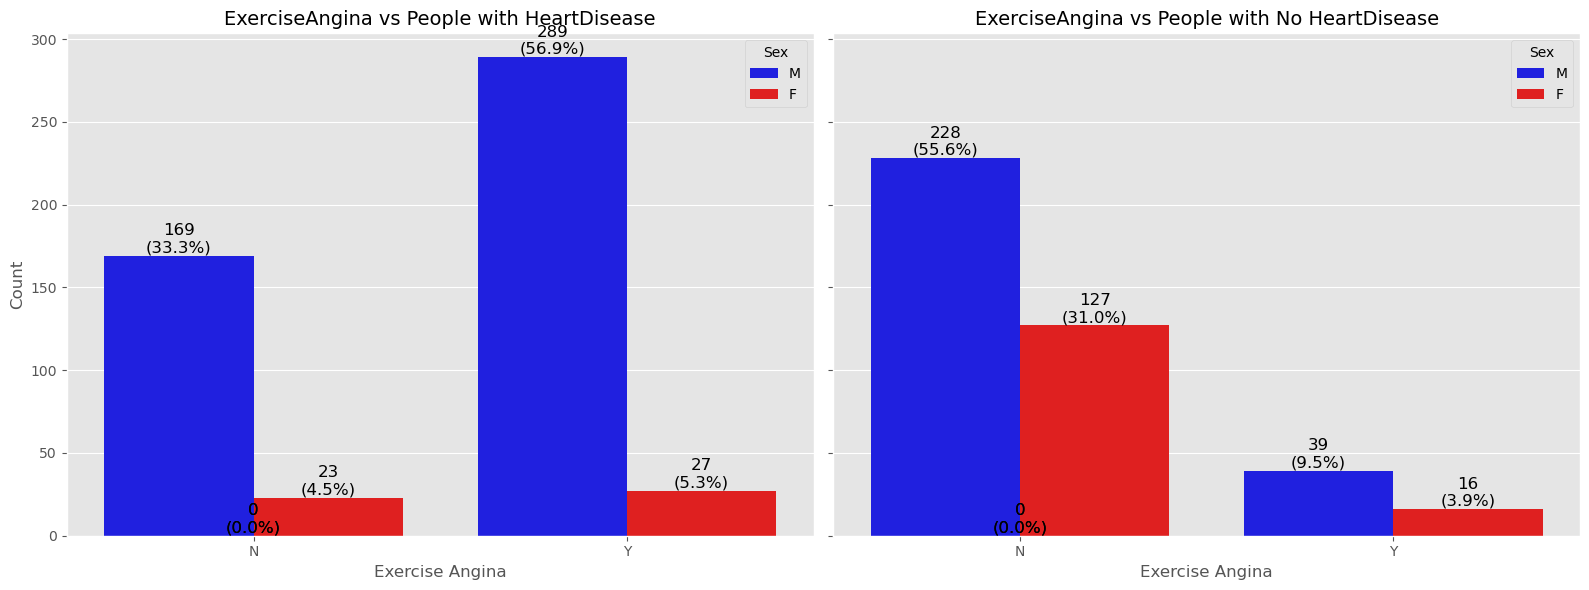

In [296]:


# Filter data
df_heart_disease_1 = df[df['HeartDisease'] == 1]
df_heart_disease_0 = df[df['HeartDisease'] == 0]

# Define custom color palette: Male ('M') = Blue, Female ('F') = Red
custom_palette = {'M': 'blue', 'F': 'red'}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for HeartDisease = 1
sns.countplot(data=df_heart_disease_1, x='ExerciseAngina', hue='Sex', hue_order=['M', 'F'], palette=custom_palette, ax=axes[0])
total_population_1 = len(df_heart_disease_1)

for p in axes[0].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    percentage = (height / total_population_1) * 100
    axes[0].text(x, y + 2, f'{int(height)}\n({percentage:.1f}%)', ha='center', fontsize=12)

axes[0].set_title('ExerciseAngina vs People with HeartDisease', fontsize=14)
axes[0].set_xlabel('Exercise Angina')
axes[0].set_ylabel('Count')

# Plot for HeartDisease = 0
sns.countplot(data=df_heart_disease_0, x='ExerciseAngina', hue='Sex', hue_order=['M', 'F'], palette=custom_palette, ax=axes[1])
total_population_0 = len(df_heart_disease_0)

for p in axes[1].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    percentage = (height / total_population_0) * 100
    axes[1].text(x, y + 2, f'{int(height)}\n({percentage:.1f}%)', ha='center', fontsize=12)

axes[1].set_title('ExerciseAngina vs People with No HeartDisease', fontsize=14)
axes[1].set_xlabel('Exercise Angina')

# Show plot
plt.tight_layout()
plt.show()
